<a href="https://colab.research.google.com/github/narendraakumar/SDNAWORK/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install torch torchvision opencv-python opencv-python-headless matplotlib yolov5
!pip install grad-cam
!pip install rembg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.4/953.4 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 112.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 7.1 MB/s eta 0:00:00
   

In [2]:
# Install detectron2
import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/$CUDA_VERSION/torch$TORCH_VERSION/index.html

torch:  2.4 ; cuda:  cu121
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu121/torch2.4/index.html
ERROR: Could not find a version that satisfies the requirement detectron2 (from versions: none)
ERROR: No matching distribution found for detectron2


In [3]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 7.4 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Cloning into 'detectron2'...
remote: Enumerating objects: 15800, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 15800 (delta 20), reused 33 (delta 13), pack-reused 15743 (from 1)
Receiving objects: 100% (15800/15800), 6.38 MiB | 8.81 MiB/s, done.
Resolving deltas: 100% (11512/11512), done.
Ignoring dataclasses: markers 'python_version < "3.7"' don't match your en

In [4]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
torch:  2.4 ; cuda:  cu121
detectron2: 0.6


In [5]:
# clone and install Mask2Former
!git clone https://github.com/facebookresearch/Mask2Former.git
%cd Mask2Former
!pip install -U opencv-python
!pip install git+https://github.com/cocodataset/panopticapi.git
!pip install -r requirements.txt
%cd mask2former/modeling/pixel_decoder/ops
!python setup.py build install
%cd ../../../../

Cloning into 'Mask2Former'...
remote: Enumerating objects: 297, done.
remote: Counting objects: 100% (210/210), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 297 (delta 118), reused 112 (delta 112), pack-reused 87 (from 1)
Receiving objects: 100% (297/297), 408.20 KiB | 6.48 MiB/s, done.
Resolving deltas: 100% (134/134), done.
/content/Mask2Former
  Using cached opencv_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (62.5 MB)
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.9.0.80
    Uninstalling opencv-python-4.9.0.80:
      Successfully uninstalled opencv-python-4.9.0.80
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sahi 0.11.18 requires opencv-python<=4.9.0.80,

  Cloning https://github.com/cocodataset/panopticapi.git to /tmp/pip-req-build-481_mmrt
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/panopticapi.git /tmp/pip-req-build-481_mmrt
  Resolved https://github.com/cocodataset/panopticapi.git to commit 7bb4655548f98f3fedc07bf37e9040a992b054b0
  Preparing metadata (setup.py) ... done
  Created wheel for panopticapi: filename=panopticapi-0.1-py3-none-any.whl size=8258 sha256=9606c21bbebc0efa825ec9adaae523e4e6aa9bf50c47b0f923b5aff558772dc1
  Stored in directory: /tmp/pip-ephem-wheel-cache-nhw8f25h/wheels/70/87/ae/5c2b138c967549070e3fe35f3b5fcaf1ed56e9f5483a09ee65
Successfully built panopticapi
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.9/74.9 kB 6.3 MB/s eta 0:00:00
/content/Mask2Former/mask2former/modeling/pixel_decoder/ops
running build
running b

In [8]:
# You may need to restart your runtime prior to this, to let your installation take effect
%cd /content/Mask2Former
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
setup_logger(name="mask2former")

# import some common libraries
import numpy as np
import cv2
import torch
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.data import MetadataCatalog
from detectron2.projects.deeplab import add_deeplab_config
coco_metadata = MetadataCatalog.get("coco_2017_val_panoptic")

# import Mask2Former project
from mask2former import add_maskformer2_config

/content/Mask2Former


In [9]:
!python /content/Mask2Former/mask2former/modeling/pixel_decoder/ops/setup.py build install

running build
running build_py
creating build
creating build/lib.linux-x86_64-cpython-310
creating build/lib.linux-x86_64-cpython-310/mask2former_video
copying mask2former_video/__init__.py -> build/lib.linux-x86_64-cpython-310/mask2former_video
copying mask2former_video/video_maskformer_model.py -> build/lib.linux-x86_64-cpython-310/mask2former_video
copying mask2former_video/config.py -> build/lib.linux-x86_64-cpython-310/mask2former_video
creating build/lib.linux-x86_64-cpython-310/mask2former
copying mask2former/__init__.py -> build/lib.linux-x86_64-cpython-310/mask2former
copying mask2former/test_time_augmentation.py -> build/lib.linux-x86_64-cpython-310/mask2former
copying mask2former/maskformer_model.py -> build/lib.linux-x86_64-cpython-310/mask2former
copying mask2former/config.py -> build/lib.linux-x86_64-cpython-310/mask2former
creating build/lib.linux-x86_64-cpython-310/mask2former_video/utils
copying mask2former_video/utils/__init__.py -> build/lib.linux-x86_64-cpython-310/

In [10]:
%matplotlib inline
import torch
import cv2
import numpy as np
from matplotlib import pyplot as plt
from rembg import remove
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import preprocess_image
from torchvision.models import resnet50
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from skimage.filters import sobel
from skimage import img_as_float, color
from PIL import Image

# Load ResNet50 model for Grad-CAM
resnet_model = resnet50(pretrained=True)
grad_cam = GradCAM(model=resnet_model, target_layers=[resnet_model.layer4[-1]])



def remove_background(image_path):
    input_image = Image.open(image_path)
    bg_removed = remove(input_image)  # Remove background using rembg
    bg_removed_np = np.array(bg_removed)  # Convert to numpy array for OpenCV processing
    return bg_removed_np

def remove_background1(image_path):
    # Load the original image
    input_image = Image.open(image_path).convert("RGBA")
    # Use rembg to remove background
    bg_removed = remove(input_image)

    # Convert both images to numpy arrays
    bg_removed_np = np.array(bg_removed)  # Hero product with transparent background
    original_np = np.array(input_image)    # Original image

    # Create a mask from the alpha channel of bg_removed_np (non-zero where hero product is)
    mask = bg_removed_np[:, :, 3] > 0  # Alpha channel

    # Use the mask to isolate the background from the original image
    background_only = original_np.copy()
    background_only[mask] = [0, 0, 0, 0]  # Make the hero product area transparent (white background)
    original_np[mask] = [0,0,0,0]
    # rgb_image = original_np.convert("RGB")
    rgb_image = original_np[:, :, :3]


    return bg_removed_np, background_only, rgb_image


def calculate_prominence(bg_removed_np,threshold = 0.1):
    hero_product_mask = cv2.cvtColor(bg_removed_np, cv2.COLOR_RGBA2GRAY)
    hero_product_mask = (hero_product_mask > 0).astype(np.uint8)

    # Calculate area ratio (prominence) as a fraction of the total image area
    hero_product_area = np.sum(hero_product_mask)
    img_area = hero_product_mask.shape[0] * hero_product_mask.shape[1]
    prominence_ratio = hero_product_area / img_area
    print("hero_product_area",hero_product_area,"img_area",img_area)
    print("prominence_ratio",prominence_ratio)
    prominence_score = 1 + (prominence_ratio * 9)
    prominence_score = np.round(prominence_score)
    if prominence_score >= 6:
        prominence_score = 10
    else:
        prominence_score = np.round((prominence_score/6)*10)
    print("prominence_score",prominence_score)
    return prominence_score

def is_centered(hero_product_mask, threshold=0.1):
    # Calculate bounding box of non-zero pixels in mask
    coords = cv2.findNonZero(hero_product_mask)
    x, y, w, h = cv2.boundingRect(coords)  # Bounding box around hero product
    img_center = (hero_product_mask.shape[1] / 2, hero_product_mask.shape[0] / 2)
    product_center = (x + w / 2, y + h / 2)
    offset = np.linalg.norm(np.array(img_center) - np.array(product_center))
    max_offset = threshold * np.linalg.norm(img_center)
    return offset <= max_offset,(x, y, x+w, y+h)

def is_centered_score(hero_product_mask,im=None, threshold=0.1):
    coords = cv2.findNonZero(hero_product_mask)
    x, y, w, h = cv2.boundingRect(coords)
    print("hero product bounding box",x,y,w,h)
    img_center = (int(hero_product_mask.shape[1] / 2), int(hero_product_mask.shape[0] / 2))
    product_center = (int((x + x+ w) / 2), int((y +y+ h )/ 2))
    # print("hero_product_mask shape",hero_product_mask.shape,"image shape",im.shape)
    # print("image center",img_center,"product center",product_center)
    # point_radius = 6  # Small radius for the point
    # point_color = (0, 0, 255)  # Red color in BGR format
    # cv2.circle(im, img_center, point_radius, point_color, thickness=1)
    # point_color = (255, 0, 0)
    # cv2.circle(im, product_center, point_radius, point_color, thickness=1)
    # cv2.imwrite("/content/i.png",im)
    offset = np.linalg.norm(np.array(img_center) - np.array(product_center))
    max_offset = np.linalg.norm(np.array(img_center)- np.array([int(w/2),int(h/2)]))

    # Calculate the score based on offset, mapping to a 1-10 scale
    print("max offset:",max_offset,"offset",offset)
    if offset <= max_offset*threshold:
        print(offset/max_offset)
        score = 10.0
    else:
        # offset_ratio = min(offset / max_offset, 2)  # Cap the ratio to prevent excessive drop
        # score = max(1, 10 - (offset_ratio - 1) * 9)  # Linear drop after threshold
        score = np.round(((1-offset/max_offset))*10)

    return score

# Generate Grad-CAM heatmap for focus analysis
# def generate_gradcam_heatmap(image, target_class=207):  # Example target class
#     preprocessed_image = preprocess_image(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
#     targets = [ClassifierOutputTarget(target_class)]
#     mask = grad_cam(input_tensor=preprocessed_image, targets=targets)[0]
#     heatmap = cv2.applyColorMap(np.uint8(255 * mask), cv2.COLORMAP_JET)
#     return cv2.addWeighted(cv2.resize(image, (mask.shape[1], mask.shape[0])), 0.6, heatmap, 0.4, 0)

def generate_gradcam_heatmap(image, model, target_class=207):  # Example target class
    # Preprocess the input image
    import cv2
    import numpy as np
    from pytorch_grad_cam.utils.image import preprocess_image
    from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
    from pytorch_grad_cam import GradCAM
    preprocessed_image = preprocess_image(
        cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
    targets = [ClassifierOutputTarget(target_class)]

    # Generate Grad-CAM mask
    with GradCAM(model=model, target_layers=[model.layer4[-1]]) as cam:
        mask = cam(input_tensor=preprocessed_image, targets=targets)[0]

    # Create color heatmap
    color_heatmap = cv2.applyColorMap(np.uint8(255 * mask), cv2.COLORMAP_JET)
    color_heatmap = cv2.addWeighted(
        cv2.resize(image, (mask.shape[1], mask.shape[0])), 0.6,
        color_heatmap, 0.4, 0
    )

    # Create grayscale heatmap
    grayscale_heatmap = np.uint8(255 * mask)  # Normalize mask to 0-255 range

    return color_heatmap, grayscale_heatmap


# Generate saliency map using Sobel edge detection
def generate_saliency_map(image):
    image_gray = color.rgb2gray(img_as_float(image))
    saliency_map = sobel(image_gray)
    saliency_map = (saliency_map * 255).astype("uint8")
    return saliency_map

# Grading based on criteria
def grade_image(centered, prominent, focus):
    grade = 0
    grade += 3 if centered else 0
    grade += 3 if prominent else 0
    grade += 4 if focus else 0
    print("centered", "prominent", "focus",centered, prominent, focus)  # Focus gets a higher weight
    return grade

def calculate_focus(bbox, gradcam_heatmap, saliency_map, overlap_threshold=0.6):
    x_min, y_min, x_max, y_max = bbox

    # Crop to bounding box region
    gradcam_crop = gradcam_heatmap[y_min:y_max, x_min:x_max]
    saliency_crop = saliency_map[y_min:y_max, x_min:x_max]

    # Convert to binary maps (1 if pixel intensity > threshold, else 0)
    gradcam_binary = (gradcam_crop > 128).astype(np.uint8)
    saliency_binary = (saliency_crop > 128).astype(np.uint8)

    # Calculate overlap (intersection of the two binary masks)
    overlap = cv2.bitwise_and(gradcam_binary, saliency_binary)
    overlap_area = np.sum(overlap)

    # Calculate focus percentage within the bounding box
    bbox_area = gradcam_binary.shape[0] * gradcam_binary.shape[1]
    focus_ratio = overlap_area / float(bbox_area)

    # Determine if focus is sufficient
    is_focused = focus_ratio >= overlap_threshold
    return is_focused, focus_ratio


# Main processing and grading function
def main(image_path):
    image = cv2.imread(image_path)

    # Background removal to extract hero product
    bg_removed_np, background_only,ip = remove_background1(image_path)
    # Focus Check - Grad-CAM
    # plt.imshow(cv2.cvtColor(bg_removed_np, cv2.COLOR_BGR2RGB))
    # plt.title("bg removed np")
    # plt.show()


    # plt.imshow(cv2.cvtColor(ip, cv2.COLOR_BGRA2RGBA))
    # plt.title("Remaining Background Only")
    # plt.show()

    # Calculate prominence
    prominence_ratio = calculate_prominence(bg_removed_np)
    prominent = prominence_ratio >= 0.3  # Example threshold for prominence
    print("Prominent (occupies enough area):", prominent)

    # Centering Check
    hero_product_mask = cv2.cvtColor(bg_removed_np, cv2.COLOR_RGBA2GRAY)
    hero_product_mask = (hero_product_mask > 0).astype(np.uint8)
    # centered,bbox = is_centered(hero_product_mask)
    centered_score = is_centered_score(hero_product_mask)
    # print("Centered:", centered)
    print("Centered score:", centered_score)

    # Focus Check - Grad-CAM
    # import torchvision.models as models
    # import torch

    # Load a pre-trained ResNet model
    # model = models.resnet50(pretrained=True)
    # model.eval()
    # gradcam_result,grayscale_heatmap = generate_gradcam_heatmap(image,model)
    # plt.imshow(cv2.cvtColor(gradcam_result, cv2.COLOR_BGR2RGB))
    # plt.title("Grad-CAM Focus Map")
    # plt.show()

    # Saliency Check
    # saliency_map = generate_saliency_map(image)
    # plt.imshow(saliency_map, cmap='gray')
    # plt.title("Saliency Map")
    # plt.show()

    # Decide if focus is on hero product by inspecting saliency overlaps (for demo assume True)
    # focus = True
    # focus, focus_ratio = calculate_focus(bbox, grayscale_heatmap, saliency_map)
    # print("Focus on hero product:", focus, "with overlap ratio:", focus_ratio)

    return centered_score, prominence_ratio


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 202MB/s]


In [11]:
cfg = get_cfg()
add_deeplab_config(cfg)
add_maskformer2_config(cfg)
cfg.merge_from_file("configs/coco/panoptic-segmentation/swin/maskformer2_swin_large_IN21k_384_bs16_100ep.yaml")
cfg.MODEL.WEIGHTS = 'https://dl.fbaipublicfiles.com/maskformer/mask2former/coco/panoptic/maskformer2_swin_large_IN21k_384_bs16_100ep/model_final_f07440.pkl'
cfg.MODEL.MASK_FORMER.TEST.SEMANTIC_ON = True
cfg.MODEL.MASK_FORMER.TEST.INSTANCE_ON = True
cfg.MODEL.MASK_FORMER.TEST.PANOPTIC_ON = True
predictor = DefaultPredictor(cfg)

/usr/local/lib/python3.10/dist-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[11/10 16:55:27 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/maskformer/mask2former/coco/panoptic/maskformer2_swin_large_IN21k_384_bs16_100ep/model_final_f07440.pkl ...


model_final_f07440.pkl: 866MB [00:06, 129MB/s]                           


WARNING [11/10 16:55:34 mask2former.modeling.transformer_decoder.mask2former_transformer_decoder]: Weight format of MultiScaleMaskedTransformerDecoder have changed! Please upgrade your models. Applying automatic conversion now ...


In [13]:
# im = cv2.imread("/content/image_4K6.png")
# cv2_imshow(im)
# outputs = predictor(im)
# v = Visualizer(im[:, :, ::-1], coco_metadata, scale=1.2, instance_mode=ColorMode.IMAGE_BW)
# panoptic_result = v.draw_panoptic_seg(outputs["panoptic_seg"][0].to("cpu"), outputs["panoptic_seg"][1]).get_image()

# panoptic_seg, segments_info = outputs["panoptic_seg"]
# panoptic_seg_np = panoptic_seg.to("cpu").numpy()

# im_with_boxes = im.copy()
# for segment in segments_info:
#     segment_id = segment["id"]
#     mask = (panoptic_seg_np == segment_id).astype(np.uint8)
#     contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     for contour in contours:
#         x, y, w, h = cv2.boundingRect(contour)
#         cv2.rectangle(im_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)
# cv2_imshow(im_with_boxes)
def get_objects(img_path):
  im = cv2.imread(img_path)
  cv2_imshow(im)
  outputs = predictor(im)
  v = Visualizer(im[:, :, ::-1], coco_metadata, scale=1.2, instance_mode=ColorMode.IMAGE_BW)
  panoptic_result = v.draw_panoptic_seg(outputs["panoptic_seg"][0].to("cpu"), outputs["panoptic_seg"][1]).get_image()

  panoptic_seg, segments_info = outputs["panoptic_seg"]
  panoptic_seg_np = panoptic_seg.to("cpu").numpy()

  im_with_boxes = im.copy()
  bbox = []
  for segment in segments_info:
      segment_id = segment["id"]
      mask = (panoptic_seg_np == segment_id).astype(np.uint8)
      contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
      for contour in contours:
          x, y, w, h = cv2.boundingRect(contour)
          cv2.rectangle(im_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)
          bbox.append([x,y,x+w,y+h])
  return bbox
  # cv2_imshow(im_with_boxes)

In [14]:
from PIL import Image
import os
new_directory = "/content"
os.chdir(new_directory)

# Open the image with transparency
image = Image.open('/content/silo.png')

# Check if the image has an alpha channel (transparency)
if image.mode in ('RGBA', 'LA') or (image.mode == 'P' and 'transparency' in image.info):
    # Create a white background image of the same size
    white_bg = Image.new("RGB", image.size, (255, 255, 255))
    # Paste the image on the white background
    white_bg.paste(image, mask=image.split()[3])  # Use alpha channel as mask
    image = white_bg

# Save the result
image.save('silo1.png', 'JPEG')

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


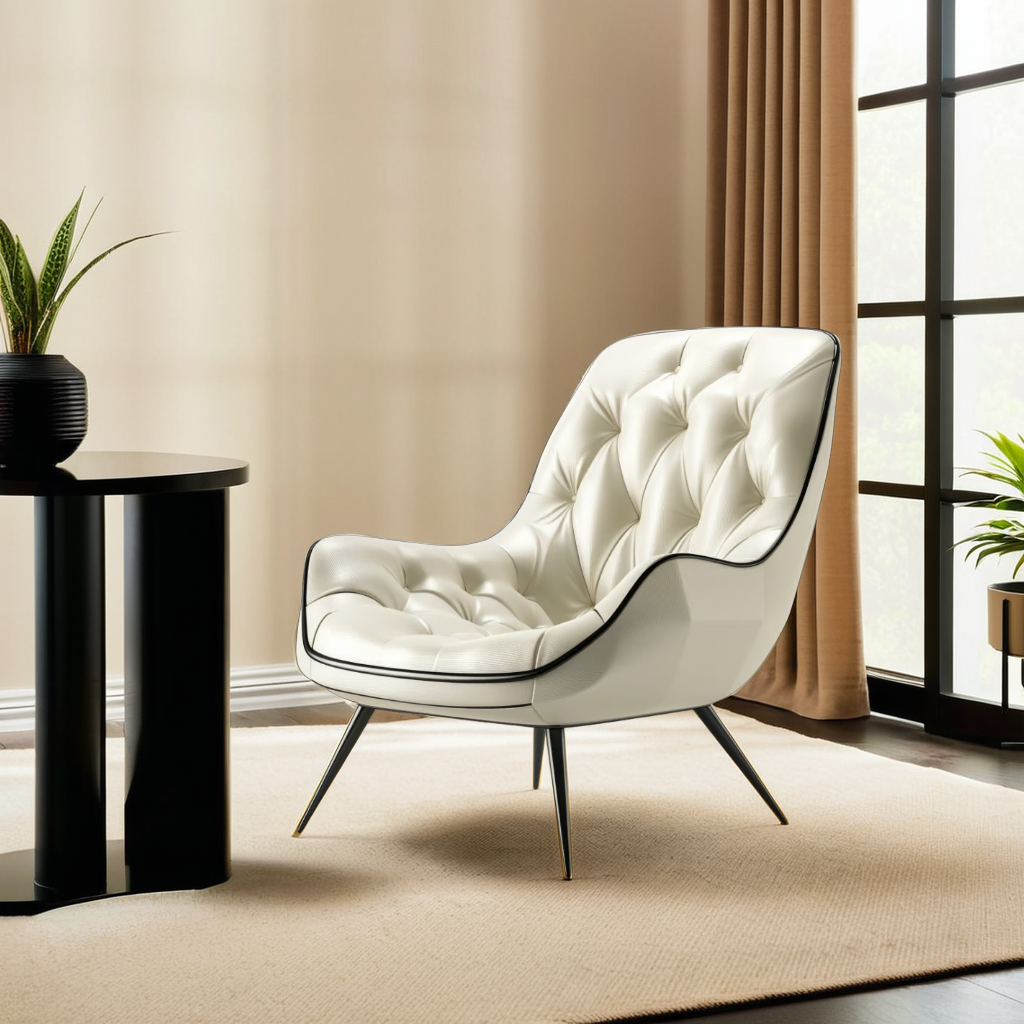

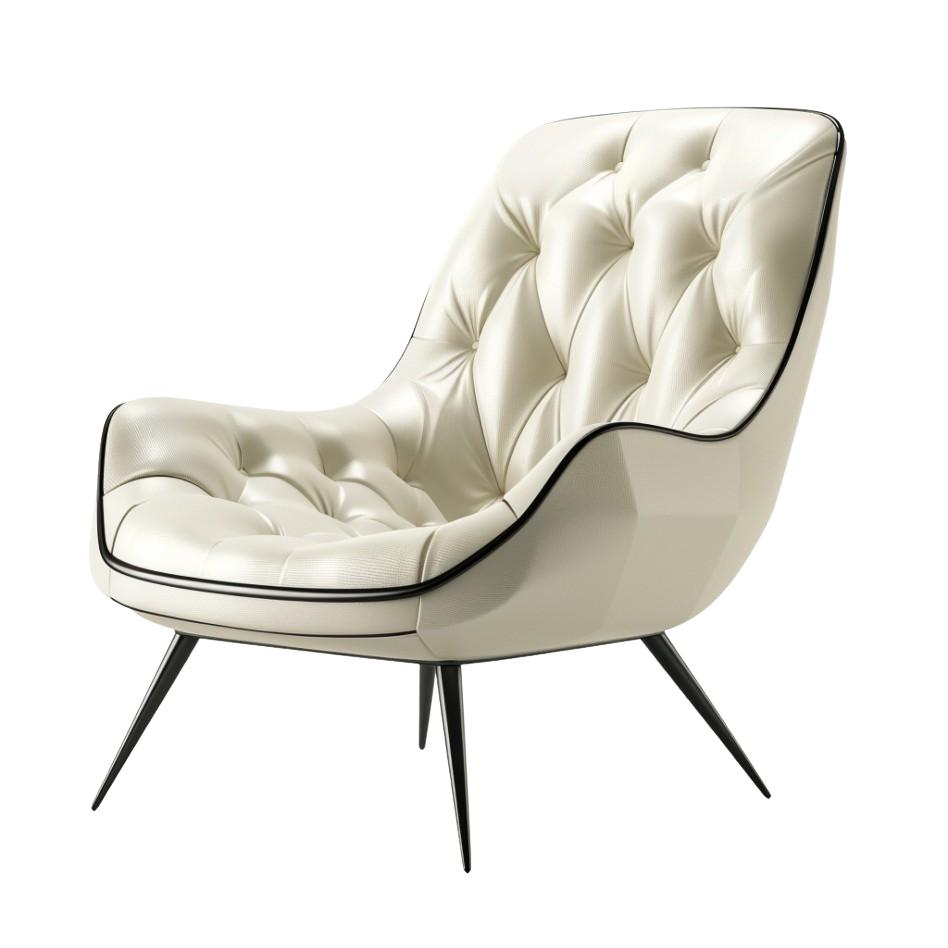

[(<PIL.Image.Image image mode=RGB size=2x14 at 0x7F999081A830>, (565, 836, 567, 850)), (<PIL.Image.Image image mode=RGB size=9x77 at 0x7F989CACA650>, (557, 743, 566, 820)), (<PIL.Image.Image image mode=RGB size=542x502 at 0x7F989CACA2C0>, (296, 326, 838, 828)), (<PIL.Image.Image image mode=RGB size=71x164 at 0x7F989CACA3E0>, (953, 431, 1024, 595)), (<PIL.Image.Image image mode=RGB size=37x109 at 0x7F989CAC8BE0>, (0, 749, 37, 858)), (<PIL.Image.Image image mode=RGB size=1024x313 at 0x7F995C363A30>, (0, 711, 1024, 1024)), (<PIL.Image.Image image mode=RGB size=162x721 at 0x7F995C361C90>, (707, 0, 869, 721)), (<PIL.Image.Image image mode=RGB size=16x201 at 0x7F995C361F90>, (108, 504, 124, 705)), (<PIL.Image.Image image mode=RGB size=40x251 at 0x7F995C363AC0>, (0, 495, 40, 746)), (<PIL.Image.Image image mode=RGB size=710x727 at 0x7F995C363A60>, (0, 0, 710, 727)), (<PIL.Image.Image image mode=RGB size=170x754 at 0x7F995C361F30>, (854, 0, 1024, 754)), (<PIL.Image.Image image mode=RGB size=396

The channel dimension is ambiguous. Got image shape (3, 8, 3). Assuming channels are the first dimension.


0.5534196496009827
(89, 108, 845, 849) (565, 836, 567, 850)
0.5656164288520813
(89, 108, 845, 849) (557, 743, 566, 820)
0.9661864042282104
(89, 108, 845, 849) (296, 326, 838, 828)
0.6534308791160583
0.5320209860801697
0.7838908433914185
0.8552141785621643
0.5289505124092102
0.5535475611686707
0.8818938732147217
0.6942242980003357
0.7151713371276855
0.6070289015769958
0.5384072065353394
0.618253767490387
0.692803144454956
0.6828441619873047


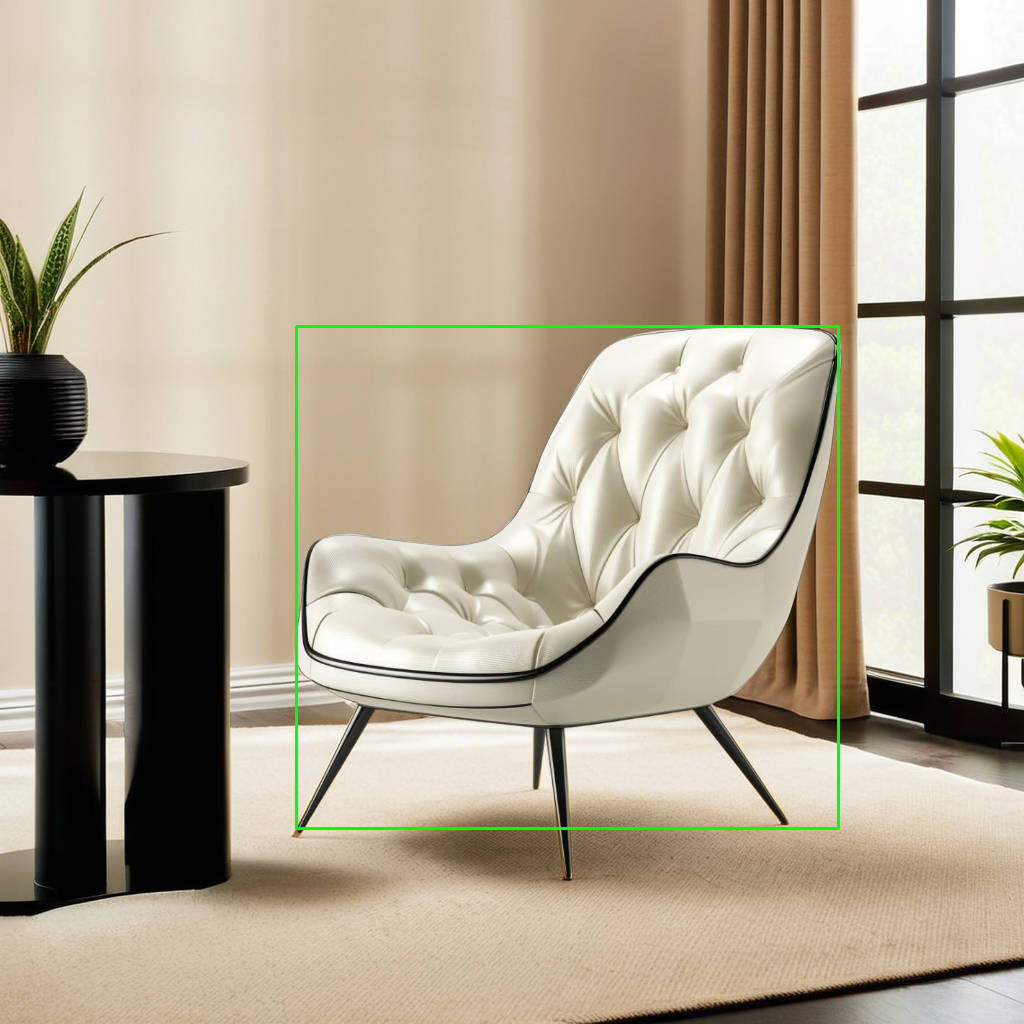

In [31]:
import torch
from PIL import Image
from transformers import CLIPProcessor, CLIPModel
import os
import numpy as np
import cv2  # For image manipulation
from google.colab.patches import cv2_imshow

clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

def get_objects(img_path):
  im = cv2.imread(img_path)
  cv2_imshow(im)
  outputs = predictor(im)
  v = Visualizer(im[:, :, ::-1], coco_metadata, scale=1.2, instance_mode=ColorMode.IMAGE_BW)
  panoptic_result = v.draw_panoptic_seg(outputs["panoptic_seg"][0].to("cpu"), outputs["panoptic_seg"][1]).get_image()

  panoptic_seg, segments_info = outputs["panoptic_seg"]
  panoptic_seg_np = panoptic_seg.to("cpu").numpy()

  im_with_boxes = im.copy()
  bbox = []
  for segment in segments_info:
      segment_id = segment["id"]
      mask = (panoptic_seg_np == segment_id).astype(np.uint8)
      contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
      for contour in contours:
          x, y, w, h = cv2.boundingRect(contour)
          cv2.rectangle(im_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)
          bbox.append([x,y,x+w,y+h])
  return bbox

def add_bbox_to_image(image_path, bbox, color=(0, 255, 0), thickness=2):
    image = cv2.imread(image_path)
    for x, y, x_max, y_max in bbox:
        cv2.rectangle(image, (x, y), (x_max, y_max), color, thickness)
    return image


def get_clip_embedding(image):
    inputs = clip_processor(images=image, return_tensors="pt")
    with torch.no_grad():
        embeddings = clip_model.get_image_features(**inputs)
    return embeddings / embeddings.norm(dim=-1, keepdim=True)  # Normalize

def crop_objects(image_path, regions):
    image = Image.open(image_path).convert("RGB")
    cropped_objects = []
    for region in regions:
        x_min, y_min, x_max, y_max = region
        cropped_object = image.crop((x_min, y_min, x_max, y_max))
        cropped_objects.append((cropped_object,(x_min, y_min, x_max, y_max)))
    return cropped_objects

def find_closest_object(target_image_path, target_regions, object_images_path, object_regions):
    target_objects = crop_objects(target_image_path, target_regions)
    print(target_objects)
    for i, obj in enumerate(target_objects):
      obj[0].save(f"/content/{i}.png")
    target_embeddings = [(get_clip_embedding(obj[0]),obj[1]) for obj in target_objects]

    closest_image_path = None

    candidate_objects = crop_objects(object_images_path, object_regions)
    for i, obj in enumerate(candidate_objects):
      obj[0].save(f"/content/{100+i}.png")
    # Get embeddings for each candidate object
    candidate_embeddings = [(get_clip_embedding(obj[0]),obj[1]) for obj in candidate_objects]

    # Compute similarity between each target and candidate object
    bbox = []
    for candidate_embedding in candidate_embeddings:
        max_similarity = -1
        for target_embedding in target_embeddings:
            similarity = torch.cosine_similarity(target_embedding[0], candidate_embedding[0]).item()
            print(similarity)
            if similarity > max_similarity:
                max_similarity = similarity
                print(candidate_embedding[1],target_embedding[1])
                tar=target_embedding[1]
        bbox.append(tar)
    return (min([b[0] for b in bbox]),min([b[1] for b in bbox]),max([b[2] for b in bbox]),max([b[3] for b in bbox]))


# Example Usage
target_image_path = "/content/image_4K6.png"
target_regions = get_objects(target_image_path)
object_images_path = "/content/silo1.png"
object_regions = get_objects(object_images_path)

bbox = find_closest_object(target_image_path, target_regions, object_images_path, object_regions)
im = add_bbox_to_image(target_image_path, [bbox])
cv2_imshow(im)

In [ ]:
import torch
from PIL import Image
from transformers import CLIPProcessor, CLIPModel
from segment_anything import SamPredictor, sam_model_registry
import numpy as np
import cv2  # For image manipulation
import os

# Load CLIP Model (for embedding and similarity)
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Load SAM Model (for segmentation/localization)
sam_checkpoint = "sam_vit_h.pth"  # Replace with the path to your SAM model checkpoint
sam = sam_model_registry["vit_h"](checkpoint=sam_checkpoint)
sam_predictor = SamPredictor(sam)

# Function to get embeddings using CLIP
def get_clip_embedding(image):
    inputs = clip_processor(images=image, return_tensors="pt")
    with torch.no_grad():
        embeddings = clip_model.get_image_features(**inputs)
    return embeddings / embeddings.norm(dim=-1, keepdim=True)  # Normalize

# Function to segment and crop objects with transparent background using SAM
def segment_and_crop_objects_with_alpha(image_path):
    image = Image.open(image_path).convert("RGB")
    image_np = np.array(image)
    sam_predictor.set_image(image_np)
    masks, _, _ = sam_predictor.predict(box=None, point_coords=None, point_labels=None, multimask_output=False)

    cropped_objects = []
    for mask in masks:
        # Convert mask to a numpy array and apply it to create an alpha channel
        mask_np = mask.cpu().numpy().astype(np.uint8) * 255
        alpha_channel = Image.fromarray(mask_np, mode="L")

        # Convert the original image to RGBA and set the background to transparent
        object_image_rgba = Image.fromarray(np.dstack((image_np, mask_np)), mode="RGBA")
        object_image_rgba.putalpha(alpha_channel)

        # Crop the bounding box around the object
        y_indices, x_indices = np.where(mask_np)
        if len(y_indices) == 0 or len(x_indices) == 0:
            continue
        x_min, x_max = x_indices.min(), x_indices.max()
        y_min, y_max = y_indices.min(), y_indices.max()

        # Crop the image to include only the object
        cropped_object = object_image_rgba.crop((x_min, y_min, x_max, y_max))
        cropped_objects.append(cropped_object)

    return cropped_objects

# Function to find the most similar object based on embeddings
def find_closest_object(target_image_path, object_images_folder):
    # Segment and crop objects in the target image
    target_objects = segment_and_crop_objects_with_alpha(target_image_path)

    # Get embeddings for each object in the target image
    target_embeddings = [get_clip_embedding(obj) for obj in target_objects]

    max_similarity = -1
    closest_image_path = None

    # Iterate through the object images folder
    for obj_image_path in os.listdir(object_images_folder):
        obj_image = Image.open(os.path.join(object_images_folder, obj_image_path))

        # Segment and crop objects in the candidate image
        candidate_objects = segment_and_crop_objects_with_alpha(os.path.join(object_images_folder, obj_image_path))

        # Get embeddings for each candidate object
        candidate_embeddings = [get_clip_embedding(obj) for obj in candidate_objects]

        # Compute similarity between each target and candidate object
        for target_embedding in target_embeddings:
            for candidate_embedding in candidate_embeddings:
                similarity = torch.cosine_similarity(target_embedding, candidate_embedding).item()
                if similarity > max_similarity:
                    max_similarity = similarity
                    closest_image_path = obj_image_path

    return closest_image_path, max_similarity

# Usage Example
target_image_path = "path/to/target/image.jpg"
object_images_folder = "path/to/object/images/folder"
closest_image_path, similarity = find_closest_object(target_image_path, object_images_folder)

print(f"The closest object image is: {closest_image_path} with similarity: {similarity:.4f}")

In [ ]:

wall_class_id = 131
for idx, class_name in enumerate(coco_metadata.stuff_classes):
    if class_name.lower() == "chair":
        wall_class_id = idx
        break



def mask_except_wall_with_transparency(image, outputs, wall_class_id):
    """Keeps only the wall class opaque and makes everything else transparent."""
    semantic_segmentation = outputs["sem_seg"].argmax(0).cpu().numpy()

    wall_mask = semantic_segmentation == wall_class_id

    transparent_image = np.zeros((image.shape[0], image.shape[1], 4), dtype=np.uint8)

    transparent_image[..., :3] = image
    transparent_image[..., 3] = np.where(wall_mask, 255, 0)
    # black_image = np.zeros_like(image)

    # black_image[wall_mask] = image[wall_mask]

    return transparent_image

masked_transparent_image = mask_except_wall_with_transparency(im, outputs, wall_class_id)

cv2_imshow(masked_transparent_image)


NameError: name 'im' is not defined

In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from collections import Counter
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def load_image(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image_rgb

def approximate_wall_area(image, lower_bound=(0, 0, 0), upper_bound=(255, 255, 255)):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    mask = cv2.inRange(hsv_image, np.array(lower_bound), np.array(upper_bound))

    wall_area = cv2.bitwise_and(image, image, mask=mask)
    return wall_area

def extract_dominant_colors(image, num_colors=3):
    flat_image = image.reshape(-1, 3)

    flat_image = flat_image[np.any(flat_image != [0, 0, 0], axis=1)]

    kmeans = KMeans(n_clusters=num_colors)
    kmeans.fit(flat_image)
    colors = kmeans.cluster_centers_

    label_counts = Counter(kmeans.labels_)
    total_count = sum(label_counts.values())

    color_proportions = {tuple(map(int, colors[i])): count / total_count for i, count in label_counts.items()}
    return color_proportions

def plot_colors(color_proportions):
    sorted_colors = dict(sorted(color_proportions.items(), key=lambda item: item[1], reverse=True))

    plt.figure(figsize=(8, 2))
    plt.axis("off")

    bar = np.zeros((50, 300, 3), dtype="uint8")
    start_x = 0

    for color, proportion in sorted_colors.items():
        end_x = start_x + int(proportion * 300)
        bar[:, start_x:end_x] = color
        start_x = end_x

    plt.imshow(bar)
    plt.show()

    for color, proportion in sorted_colors.items():
        color = "{0}:{1}:{2}".format(color[0], color[1], color[2])
        print(f"Color {color}: {proportion:.2%}")

def analyze_wall_colors(image_path, num_colors=3):
    image = load_image(image_path)
    wall_area = approximate_wall_area(image)

    color_proportions = extract_dominant_colors(wall_area, num_colors)

    plot_colors(color_proportions)

# analyze_wall_colors("/content/masked_transparent_image.png", num_colors=7)

In [ ]:
import os
new_directory = "/content"
os.chdir(new_directory)
!unzip /content/testdatawayfair.zip

Archive:  /content/testdatawayfair.zip
   creating: testdatawayfair/
  inflating: __MACOSX/._testdatawayfair  
  inflating: testdatawayfair/.DS_Store  
  inflating: __MACOSX/testdatawayfair/._.DS_Store  
   creating: testdatawayfair/7/
  inflating: __MACOSX/testdatawayfair/._7  
   creating: testdatawayfair/6/
  inflating: __MACOSX/testdatawayfair/._6  
   creating: testdatawayfair/1/
  inflating: __MACOSX/testdatawayfair/._1  
   creating: testdatawayfair/4/
  inflating: __MACOSX/testdatawayfair/._4  
   creating: testdatawayfair/3/
  inflating: __MACOSX/testdatawayfair/._3  
   creating: testdatawayfair/2/
  inflating: __MACOSX/testdatawayfair/._2  
   creating: testdatawayfair/5/
  inflating: __MACOSX/testdatawayfair/._5  
  inflating: testdatawayfair/7/silo.png  
  inflating: __MACOSX/testdatawayfair/7/._silo.png  
  inflating: testdatawayfair/7/imgpsh_fullsize_anim (7).jpeg  
  inflating: __MACOSX/testdatawayfair/7/._imgpsh_fullsize_anim (7).jpeg  
  inflating: testdatawayfair/6/s

In [ ]:
import os
import glob

def get_all_image_paths(main_folder):
    image_paths = {}

    for root, dirs, files in os.walk(main_folder):
        current_folder_images = []

        for ext in ('*.png', '*.jpeg', '*.jpg'):
            current_folder_images.extend(glob.glob(os.path.join(root, ext)))

        if current_folder_images:
            folder_name = os.path.relpath(root, main_folder)
            image_paths[folder_name] = current_folder_images

    return image_paths
all_imgs = get_all_image_paths("/content/testdatawayfair")

In [ ]:
all_imgs

{'1': ['/content/testdatawayfair/1/imgpsh_fullsize_anim (13)_2.png',
  '/content/testdatawayfair/1/imgpsh_fullsize_anim (13).png',
  '/content/testdatawayfair/1/image_2-8.png',
  '/content/testdatawayfair/1/silo.png'],
 '5': ['/content/testdatawayfair/5/silo.png',
  '/content/testdatawayfair/5/image_4K6.png'],
 '6': ['/content/testdatawayfair/6/silo.png',
  '/content/testdatawayfair/6/image_wDT.jpeg'],
 '7': ['/content/testdatawayfair/7/silo.png',
  '/content/testdatawayfair/7/imgpsh_fullsize_anim (7).jpeg'],
 '2': ['/content/testdatawayfair/2/silo.png',
  '/content/testdatawayfair/2/image_u0e_1_2k.png'],
 '4': ['/content/testdatawayfair/4/unnamed1-removebg-preview.png',
  '/content/testdatawayfair/4/image_NT2.jpeg',
  '/content/testdatawayfair/4/image_yMs.jpeg',
  '/content/testdatawayfair/4/image_jWp.jpeg',
  '/content/testdatawayfair/4/image_5cl.jpeg'],
 '3': ['/content/testdatawayfair/3/silo.png',
  '/content/testdatawayfair/3/image_6Ww.jpeg',
  '/content/testdatawayfair/3/image_YZ

In [ ]:
for sku in all_imgs:
  for img_path in all_imgs[sku]:
    print(img_path)
    centered_score, prominence_ratio = main(img_path)

    print(centered_score,prominence_ratio)


/content/testdatawayfair/1/imgpsh_fullsize_anim (13)_2.png
Prominent (occupies enough area): True
hero product bounding box 118 717 1757 1640
max offset: 589.1858789889656 offset 264.78104161740885
Centered score: 6.0
6.0 4.32
/content/testdatawayfair/1/imgpsh_fullsize_anim (13).png
Prominent (occupies enough area): True
hero product bounding box 510 732 1759 1642
max offset: 728.0618105628121 offset 190.64626930522402
Centered score: 7.0
7.0 3.78
/content/testdatawayfair/1/image_2-8.png
Prominent (occupies enough area): True
hero product bounding box 189 275 660 626
max offset: 269.675731203236 offset 76.32168761236873
Centered score: 7.0
7.0 3.83
/content/testdatawayfair/1/silo.png
Prominent (occupies enough area): True
hero product bounding box 517 759 1723 1598
max offset: 756.46149935076 offset 194.50449866262733
Centered score: 7.0
7.0 3.67
/content/testdatawayfair/5/silo.png
Prominent (occupies enough area): True
hero product bounding box 88 106 760 766
max offset: 130.831953283

In [ ]:
!pip install openpyxl pillow

In [ ]:
import openpyxl
from openpyxl.drawing.image import Image as OpenpyxlImage
from openpyxl.utils import get_column_letter
from openpyxl.styles import Font, Alignment

wb = openpyxl.Workbook()
ws = wb.active
ws.title = "Product Scores"

headers = ["Product/SKU", "Image","Centering Score", "Prominence Score", "Wall Color Range", "Color Palette Analysis Score"]
# Set font for the header row
header_font = Font(bold=True, size=16)  # Larger, bold font for headers
data_font = Font(size=12)  # Font size for data cells

# Set column widths for better visibility
column_widths = [16, 14, 15, 15, 15, 15]  # Adjust as necessary

# Write headers with styling
row_num = 1
for col_num, (header, width) in enumerate(zip(headers, column_widths), start=1):
    cell = ws.cell(row=1, column=col_num, value=header)
    cell.font = header_font  # Apply header font style
    cell.alignment = Alignment(horizontal="center", vertical="center", wrap_text=True)  # Center align headers with wrap
    ws.column_dimensions[get_column_letter(col_num)].width = width  # Set column width

# Set the height of the header row to accommodate wrapped text
ws.row_dimensions[row_num].height = 40

row_height = 60

for i,sku in enumerate(all_imgs):
  for j,img_path in enumerate(all_imgs[sku]):
    if img_path.split("/")[-1].split(".")[0].endswith("silo"):
      continue
    row_num+=1
    print(img_path)
    centered_score, prominence_ratio = main(img_path)
    ws.cell(row=row_num, column=1, value=i)
    ws.cell(row=row_num, column=3, value=centered_score)
    ws.cell(row=row_num, column=4, value=prominence_ratio)
    ws.cell(row=row_num, column=5, value=0)
    ws.cell(row=row_num, column=6, value=0)
        # Style data cells
    for col in range(1, 7):
        cell = ws.cell(row=row_num, column=col)
        cell.font = data_font  # Apply font size
        cell.alignment = Alignment(horizontal="center", vertical="center")  # Center align data
    ws.row_dimensions[row_num].height = row_height

    if img_path:
        try:
            img = OpenpyxlImage(img_path)
            img.height = 80
            img.width = 80
            img.anchor = f"{get_column_letter(2)}{row_num}"  # Column "F" for images
            ws.add_image(img)
            # ws.add_image(img, f"{get_column_letter(2)}{row_num}")
            cell = ws.cell(row=row_num, column=2)
            cell.alignment = Alignment(horizontal="center", vertical="center")
        except Exception as e:
            print(f"Error adding image for {i}: {e}")



output_excel_path = "product_scores_with_images.xlsx"
wb.save(output_excel_path)

print(f"Excel file with images saved as {output_excel_path}")

/content/testdatawayfair/6/image_wDT.jpeg
hero_product_area 262114 img_area 1048576
prominence_ratio 0.2499713897705078
prominence_score 5.0
Prominent (occupies enough area): True
hero product bounding box 0 249 900 680
max offset: 182.8332573685652 offset 98.85848471426213
Centered score: 5.0
/content/testdatawayfair/7/imgpsh_fullsize_anim (7).jpeg
hero_product_area 1357516 img_area 4194304
prominence_ratio 0.3236570358276367
prominence_score 7.0
Prominent (occupies enough area): True
hero product bounding box 338 651 1346 1186
max offset: 555.8435031553396 offset 220.38375620721234
Centered score: 6.0
/content/testdatawayfair/4/unnamed1-removebg-preview.png
hero_product_area 43902 img_area 157696
prominence_ratio 0.2783964082792208
prominence_score 7.0
Prominent (occupies enough area): True
hero product bounding box 50 0 462 305
max offset: 25.079872407968907 offset 25.079872407968907
Centered score: 0.0
/content/testdatawayfair/4/image_5cl.jpeg
hero_product_area 189902 img_area 8991